In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression

Die Olympischen Spiele und die Fußball-Weltmeisterschaft gehören zu den beliebtesten sportlichen Veranstaltungen der Welt. In diesem Fall wird die Sportveranstaltung der Olympischen Spiele analysiert, wobei interessante Daten verschiedener Teilnehmer im Laufe der Geschichte dieser Spiele präsentiert werden. Dabei wird zwischen den Sommer- und den Winterolympischen Spielen unterschieden


In [19]:
# Daten Übersicht

In [20]:
df_olim = pd.read_csv('dataset_olympics.csv')

In [21]:
df_olim.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [22]:
df_olim.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [23]:
df_olim.shape[0]     

70000

In [24]:
df_olim.iloc[0:10,0:6]

,ID,Name,Sex,Age,Height,Weight
0,1,A Dijiang,M,24.0,180.0,80.0
1,2,A Lamusi,M,23.0,170.0,60.0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0


In [25]:
# Überprüfung auf Nullwerte. Data Cleaning

In [26]:
df_olim.isnull().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [27]:
df_olim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [28]:
# Ersetzen von NULL-Werten

In [29]:
df_olim['Medal'].fillna('-', inplace = True)
df_olim['Age'].fillna(df_olim['Age'].mean(), inplace = True)
df_olim['Height'].fillna(df_olim['Height'].mean(), inplace = True)
df_olim['Weight'].fillna(df_olim['Weight'].mean(), inplace = True)

In [30]:
df_olim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     70000 non-null  float64
 4   Height  70000 non-null  float64
 5   Weight  70000 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   70000 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [31]:
df_olim.head(8)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,-
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,-
2,3,Gunnar Nielsen Aaby,M,24.0,175.505303,70.900216,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,-
3,4,Edgar Lindenau Aabye,M,34.0,175.505303,70.900216,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,-
5,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",-
6,5,Christine Jacoba Aaftink,F,25.0,185.000000,82.000000,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,-
7,5,Christine Jacoba Aaftink,F,25.0,185.000000,82.000000,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",-


In [32]:
df_olim.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.357423,9.099055,12.359378,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,22.000000,170.000000,64.000000,1960.000000
50%,18032.000000,25.000000,175.505303,70.900216,1984.000000
75%,26978.000000,28.000000,180.000000,75.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [33]:
df_olim['Age'].describe()

count    70000.000000
mean        25.644645
std          6.357423
min         11.000000
25%         22.000000
50%         25.000000
75%         28.000000
max         88.000000
Name: Age, dtype: float64

In [34]:
# Teilnehmer, die Medaillen gewonnen haben

In [35]:
df_olim_win = df_olim['Medal'] != '-'

In [36]:
df_olim_win.sum()

9690

In [37]:
# Insgesamt gewonnene Medaillen im Verlauf der Olympischen Spiele.

In [38]:
df_olim_totmed=df_olim[df_olim_win]
df_olim_totmed

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.505303,70.900216,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,175.505303,70.900216,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,175.505303,70.900216,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.000000,85.000000,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69957,35636,"Joseph Francis ""Joe"" Fitzgerald",M,27.0,175.505303,81.000000,United States,USA,1932 Winter,1932,Winter,Lake Placid,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver
69974,35644,Benita P. Fitzgerald-Brown (-Mosley),F,23.0,178.000000,65.000000,United States,USA,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 100 metres Hurdles,Gold
69977,35647,"James Paul ""Jim"" Fitzpatrick",M,27.0,175.505303,70.900216,United States,USA,1920 Summer,1920,Summer,Antwerpen,Rugby,Rugby Men's Rugby,Gold
69983,35651,Theresa Matauaina Fitzpatrick,F,21.0,168.000000,75.000000,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Women's Rugby Sevens,Silver


In [39]:
df_olim_totmed['Medal'].value_counts()

Medal
Gold      3292
Bronze    3208
Silver    3190
Name: count, dtype: int64

In [40]:
# Mannschaftsmedaillen

In [41]:
df_olim_totmedgraf = df_olim_totmed.loc[:, ['NOC', 'Medal']].value_counts().reset_index(name='count').head(25)
df_olim_totmedgraf
#df_olim_totmedgraf['Team'].unique()

,NOC,Medal,count
0,USA,Gold,747
1,USA,Silver,448
2,USA,Bronze,366
3,FRA,Bronze,257
4,FRA,Silver,218
5,ITA,Gold,217
6,URS,Gold,216
7,GBR,Gold,211
8,GBR,Silver,207
9,ITA,Bronze,194


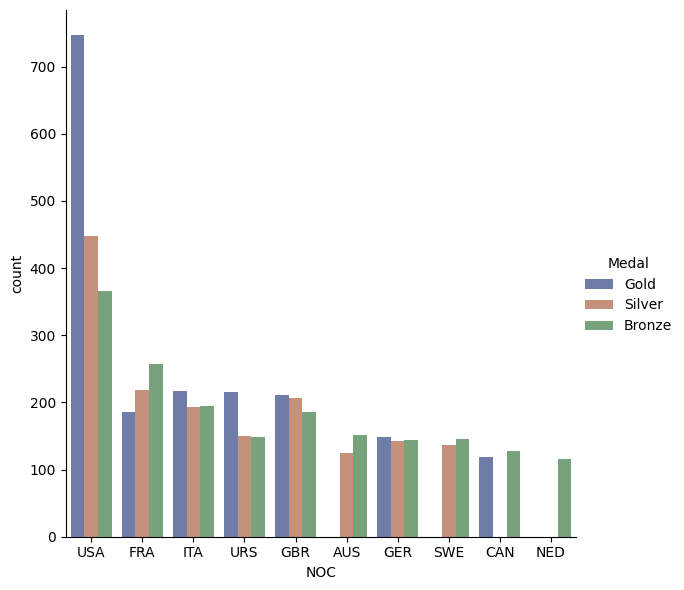

In [42]:
g = sns.catplot(
    data=df_olim_totmedgraf, kind="bar",
    x="NOC", y="count", hue="Medal",
    errorbar="sd", palette="dark", alpha=.6, height=6
)

In [43]:
df_olim_totmed.loc[:, ['NOC', 'Medal']].value_counts().tail(10)

NOC  Medal 
GEO  Gold      1
PRK  Bronze    1
POR  Gold      1
THA  Gold      1
     Silver    1
TJK  Silver    1
TOG  Bronze    1
KGZ  Silver    1
IRI  Gold      1
AHO  Silver    1
Name: count, dtype: int64

In [44]:
#df_olim_totmed.groupby('Team')['Medal'].value_counts(ascending=False).head(20)
da2=df_olim_totmed.groupby('Sex')['Medal'].value_counts(ascending=False).reset_index(name='count')
da2

,Sex,Medal,count
0,F,Gold,906
1,F,Silver,855
2,F,Bronze,838
3,M,Gold,2386
4,M,Bronze,2370
5,M,Silver,2335


In [45]:
# Verhältnis von Frauen zu Männern, die mit Medaille gewinnen

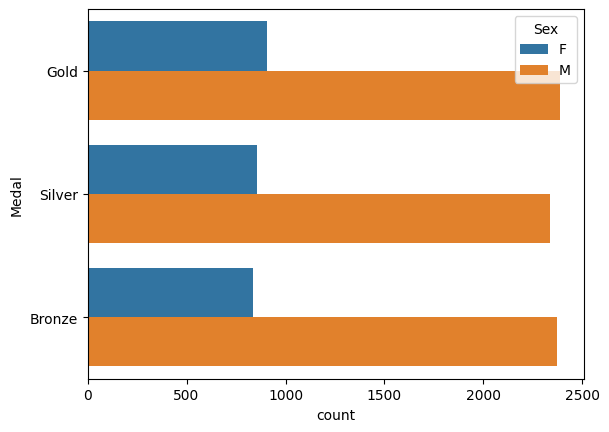

In [46]:
per_sex = sns.barplot(data=da2, x='count', y='Medal', hue='Sex')

In [47]:
#fig = px.sunburst(df_olim_totmed, path=['Sex','Medal']).update_traces(textinfo='label+percent parent')
#fig.show()

In [48]:
# Hier sehen wir die Teilnehmer mit der größten Anzahl an Teilnahmen im Verlauf der Olympischen Spiele.

In [49]:
df_olim['Name'].value_counts()

Name
Oksana Aleksandrovna Chusovitina         29
Ole Einar Bjrndalen                      27
Adrianus Egbert Willem "Arie" de Jong    27
Gustaf Eric Carlberg                     26
Pasquale Carminucci                      24
                                         ..
James Steven "Jim" Bregman                1
Juan Bregaliano                           1
Otto Breg                                 1
Daan Breeuwsma                            1
Marek Fiurek                              1
Name: count, Length: 35556, dtype: int64

In [50]:
# Liste der Olympiasieger mit Goldmedaillen.

In [51]:
df_olim_gold = df_olim[df_olim['Medal'] == 'Gold']

In [52]:
df_olim_gold['Medal'].value_counts()

Medal
Gold    3292
Name: count, dtype: int64

In [53]:
df_olim_gold['Team'].value_counts().head(10)

Team
United States    709
Soviet Union     212
Italy            202
France           167
Great Britain    154
Germany          133
Canada           107
Australia         97
Hungary           94
Norway            82
Name: count, dtype: int64

In [54]:
# Teilnehmer, die Deutschland repräsentierten.

In [55]:
df_olim_de = df_olim[df_olim['Team'] == 'Germany']
df_olim_de.head(15)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
261,133,Franz Abb,M,25.644645,175.505303,70.900216,Germany,GER,1900 Summer,1900,Summer,Paris,Gymnastics,Gymnastics Men's Individual All-Around,-
669,389,Adolf Gaston Abel,M,45.000000,175.505303,70.900216,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",-
670,389,Adolf Gaston Abel,M,45.000000,175.505303,70.900216,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",-
687,396,Katja Abel,F,25.000000,165.000000,55.000000,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Individual All-Around,-
688,396,Katja Abel,F,25.000000,165.000000,55.000000,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,-
689,396,Katja Abel,F,25.000000,165.000000,55.000000,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Floor Exercise,-
690,396,Katja Abel,F,25.000000,165.000000,55.000000,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Uneven Bars,-
691,396,Katja Abel,F,25.000000,165.000000,55.000000,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Balance Beam,-
703,402,Arthur Abele,M,22.000000,184.000000,85.000000,Germany,GER,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's Decathlon,-
704,402,Arthur Abele,M,30.000000,184.000000,85.000000,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Decathlon,-


In [87]:
# Die Gesamtanzahl der Teilnahmen jedes Athleten, der Deutschland repräsentiert hat.

In [57]:
df_olim_de['Name'].value_counts()

Name
Martina Maria Ertl-Renz           17
Ursula "Uschi" Disl               17
Helmut Bantz                      16
Antje Buschschulte (-Meeuw)       16
Sven Fischer                      15
                                  ..
Dieter Bokeloh                     1
Kirsten Bolm                       1
Wilhelm Andreas "Willi" Boltze     1
Henning Bommel                     1
Manfred Fitze                      1
Name: count, Length: 915, dtype: int64

In [58]:
df_olim_de['Age'].mean()

27.096898434139327

In [88]:
# Entfernen der Duplikate, um weitere Analysen durchzuführen.

In [60]:
df_olim1 = df_olim['Name'].unique()

In [61]:
df_olim1

array(['A Dijiang', 'A Lamusi', 'Gunnar Nielsen Aaby', ...,
       'Stuart Fitzsimmons', 'David Thomas "Dave" Fitzsimons',
       'Marek Fiurek'], dtype=object)

In [62]:
len(df_olim1)

35556

In [63]:
df_olim.drop_duplicates(subset='Name', keep='first')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,-
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,-
2,3,Gunnar Nielsen Aaby,M,24.0,175.505303,70.900216,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,-
3,4,Edgar Lindenau Aabye,M,34.0,175.505303,70.900216,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69992,35654,"Patrick ""Pat"" Fitzsimmons",M,20.0,160.000000,56.000000,Ireland,IRL,1964 Summer,1964,Summer,Tokyo,Boxing,Boxing Men's Featherweight,-
69993,35655,Riley Fitzsimmons,M,20.0,192.000000,93.000000,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",-
69994,35656,Stuart Fitzsimmons,M,19.0,175.505303,70.900216,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Downhill,-
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.000000,65.000000,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",-


In [64]:
df_olim1_1 = df_olim.drop_duplicates(keep= 'first', subset='Name')

In [65]:
len(df_olim1_1) == len(df_olim1)

True

In [66]:
df_olim1_1.describe()

,ID,Age,Height,Weight,Year
count,35556.000000,35556.000000,35556.000000,35556.000000,35556.000000
mean,17828.059371,24.587675,176.168072,71.741760,1976.123917
std,10292.892991,5.664483,8.812171,12.320331,30.685728
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,8915.750000,21.000000,172.000000,66.000000,1956.000000
50%,17823.500000,24.000000,175.505303,70.900216,1984.000000
75%,26739.250000,27.000000,180.000000,76.000000,2000.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [67]:
df_olim.sort_values('Year', ascending= False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
49524,25509,Christelle Daunay,F,41.000000,162.000000,43.000000,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Marathon,-
3041,1696,Malika Al-Akkaoui,F,28.000000,160.000000,49.000000,Morocco,MAR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 800 metres,-
13638,7379,Bernardo Baloyes Navas,M,22.000000,168.000000,66.000000,Colombia,COL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 200 metres,-
51228,26336,Habib de las Salas de la Rosa,M,29.000000,159.000000,56.000000,Colombia,COL,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Bantamweight,-
13578,7354,Gbor Balog,M,25.000000,186.000000,80.000000,Hungary,HUN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Medley Relay,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68790,35094,Angelos Fetsis,M,25.644645,175.505303,70.900216,Greece,GRE,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 800 metres,-
58733,30049,Dimitrios Drivas,M,25.644645,175.505303,70.900216,Greece,GRE,1896 Summer,1896,Summer,Athina,Swimming,Swimming Men's 100 metres Freestyle For Sailors,Bronze
68789,35093,Alexios Fetsis,M,25.644645,175.505303,70.900216,Greece,GRE,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Military Rifle, 200 metres",-
68788,35093,Alexios Fetsis,M,25.644645,175.505303,70.900216,Greece,GRE,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Free Rifle, Three Positions, 30...",-


In [68]:
#df_olim.groupby('Name').sum()

In [69]:
#df_olim_indname = df_olim.set_index('Name')


In [70]:
#df_olim.groupby('Name').mean(numeric_only=True).loc['Sven Fischer', ['Age','Height','Weight']]

In [71]:
#df_olim['Sex']

In [72]:
df_olim.groupby('Name').sum().reset_index()

,Name,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,"Gabrielle Marie ""Gabby"" Adcock (White-)",869,F,25.0,167.000000,70.900216,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Mixed Doubles,-
1,Luis ngel Fernando de los Santos Grossi,131940,MMMMM,131.0,877.526514,354.501078,UruguayUruguayUruguayUruguayUruguay,URUURUURUURUURU,1948 Summer1952 Summer1952 Summer1952 Summer19...,9756,SummerSummerSummerSummerSummer,LondonHelsinkiHelsinkiHelsinkiHelsinki,CyclingCyclingCyclingCyclingCycling,"Cycling Men's Team Pursuit, 4,000 metresCyclin...",-----
2,Th Anh,29842,F,20.0,165.000000,58.000000,Vietnam,VIE,2016 Summer,2016,Summer,Rio de Janeiro,Fencing,"Fencing Women's Foil, Individual",-
3,Th Ngn Thng,208901,FFFFFFF,141.0,1029.000000,329.000000,VietnamVietnamVietnamVietnamVietnamVietnamVietnam,VIEVIEVIEVIEVIEVIEVIE,2008 Summer2008 Summer2008 Summer2008 Summer20...,14064,SummerSummerSummerSummerSummerSummerSummer,BeijingBeijingBeijingBeijingBeijingLondonLondon,GymnasticsGymnasticsGymnasticsGymnasticsGymnas...,Gymnastics Women's Individual All-AroundGymnas...,-------
4,Tin Tun,29844,M,21.0,173.000000,63.000000,Vietnam,VIE,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Welterweight,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35551,zcan Ediz,62834,MM,34.0,351.010605,141.800431,TurkeyTurkey,TURTUR,1992 Summer1992 Summer,3984,SummerSummer,BarcelonaBarcelona,ArcheryArchery,Archery Men's IndividualArchery Men's Team,--
35552,zdemir Akbal,3174,MM,46.0,356.000000,116.000000,TurkeyTurkey,TURTUR,2000 Summer2000 Summer,4000,SummerSummer,SydneySydney,ArcheryArchery,Archery Men's IndividualArchery Men's Team,--
35553,zden Ezinler,33596,F,22.0,166.000000,50.000000,Turkey,TUR,1972 Summer,1972,Summer,Munich,Fencing,"Fencing Women's Foil, Individual",-
35554,zer Atei,17361,MMM,75.0,540.000000,216.000000,TurkeyTurkeyTurkey,TURTURTUR,1968 Winter1968 Winter1968 Winter,5904,WinterWinterWinter,GrenobleGrenobleGrenoble,Alpine SkiingAlpine SkiingAlpine Skiing,Alpine Skiing Men's DownhillAlpine Skiing Men'...,---


In [73]:
df_olim.groupby('Name').mean(numeric_only=True)

,ID,Age,Height,Weight,Year
Name,,,,,
"Gabrielle Marie ""Gabby"" Adcock (White-)",869.0,25.000000,167.000000,70.900216,2016.000000
Luis ngel Fernando de los Santos Grossi,26388.0,26.200000,175.505303,70.900216,1951.200000
Th Anh,29842.0,20.000000,165.000000,58.000000,2016.000000
Th Ngn Thng,29843.0,20.142857,147.000000,47.000000,2009.142857
Tin Tun,29844.0,21.000000,173.000000,63.000000,1988.000000
...,...,...,...,...,...
zcan Ediz,31417.0,17.000000,175.505303,70.900216,1992.000000
zdemir Akbal,1587.0,23.000000,178.000000,58.000000,2000.000000
zden Ezinler,33596.0,22.000000,166.000000,50.000000,1972.000000


In [ ]:
# Medaillen nach dem Alter des Athleten erreicht.

In [74]:
df_2 = df_olim.groupby('Age')['Medal'].count().sort_values(ascending=False).reset_index(name='Medal')
df_2

,Age,Medal
0,23.0,5612
1,24.0,5464
2,22.0,5283
3,25.0,5097
4,21.0,5068
...,...,...
64,67.0,1
65,75.0,1
66,66.0,1
67,84.0,1


In [75]:
#df.columns

<Axes: xlabel='Age', ylabel='Medal'>

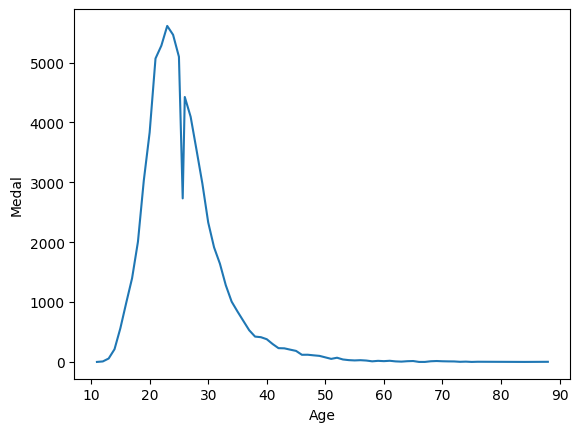

In [76]:
sns.lineplot(x="Age", y="Medal", data=df_2)

In [77]:
df_olim.groupby('Team').mean(numeric_only=True)

,ID,Age,Height,Weight,Year
Team,,,,,
30. Februar,34666.000000,23.000000,167.000000,70.000000,1952.000000
A North American Team,33107.333333,41.333333,175.505303,70.900216,1900.000000
Acipactli,26276.000000,44.000000,171.000000,69.000000,1964.000000
Acturus,18513.000000,25.644645,175.505303,70.900216,1948.000000
Afghanistan,14840.447368,24.791871,172.344617,68.013243,1969.578947
...,...,...,...,...,...
Yugoslavia,18419.724954,24.614777,177.254830,72.897518,1965.005464
Yugoslavia-1,4212.000000,29.000000,169.000000,69.000000,1972.000000
Zambia,20442.023256,23.400540,171.175528,66.053523,1987.906977


In [78]:
df_olim.groupby('Team')['Age'].mean().sort_values(ascending=False)

Team
Llanoria                         59.0
Oleander II                      55.0
Lett                             55.0
Bermudes                         54.0
Web III                          52.0
                                 ... 
Marga-2                          19.0
Italy-3                          18.0
Roklubb Kbnhavn-2                18.0
Christian Brothers' College-1    17.5
Kiribati                         17.0
Name: Age, Length: 827, dtype: float64

In [79]:
df_olim.groupby('Team')['Weight'].mean().sort_values(ascending=False)

Team
Nauru                   108.166667
London City Police-1     99.000000
Puerto Rico-1            96.000000
Latvia-1                 95.390022
Gem IV                   95.000000
                           ...    
Maldives                 54.916667
Vietnam                  53.257906
Rhodesia                 52.500000
Elvis Va                 51.000000
Israel-1                 45.000000
Name: Weight, Length: 827, dtype: float64

In [80]:
#f_olim.groupby('Team').agg(['min','max'])

df_olim.groupby('Team').agg({'Age':['min','max'],'Height':['min','max'],'Weight':['min','max']})

Age                 Height              \
                             min        max         min         max   
Team                                                                  
30. Februar            23.000000  23.000000  167.000000  167.000000   
A North American Team  38.000000  44.000000  175.505303  175.505303   
Acipactli              44.000000  44.000000  171.000000  171.000000   
Acturus                25.644645  25.644645  175.505303  175.505303   
Afghanistan            17.000000  34.000000  156.000000  186.000000   
...                          ...        ...         ...         ...   
Yugoslavia             15.000000  38.000000  157.000000  213.000000   
Yugoslavia-1           29.000000  29.000000  169.000000  169.000000   
Zambia                 16.000000  32.000000  150.000000  187.000000   
Zimbabwe               16.000000  39.000000  151.000000  205.000000   
rn-2                   27.000000  35.000000  175.505303  176.000000   

                          Weight              
                             min         max  
Team                                          
30. Februar            70.000000   70.000000  
A North American Team  70.900216   70.900216  
Acipactli              69.000000   69.000000  
Acturus                70.900216   70.900216  
Afghanistan            48.000000   99.000000  
...                          ...         ...  
Yugoslavia             44.000000  120.000000  
Yugoslavia-1           69.000000   69.000000  
Zambia                 48.000000   95.000000  
Zimbabwe               48.000000  106.000000  
rn-2                   70.900216   82.000000  

[827 rows x 6 columns]

In [81]:
df_olim.groupby(['Year','Team'])[['Age','Height','Weight']].count().sort_values(by='Age')

,,Age,Height,Weight
Year,Team,,,
2002,Canada-1,1,1,1
2010,Pakistan,1,1,1
2004,Belize,1,1,1
1968,Tunisia,1,1,1
2010,Mongolia,1,1,1
...,...,...,...,...
1992,United States,251,251,251
1932,United States,254,254,254
1992,France,256,256,256


In [82]:
df_olim.groupby(['Games','Team'])[['Age','Height','Weight']].mean().sort_values(by='Age')

Age      Height     Weight
Games       Team                                           
1932 Winter Great Britain  12.000000  163.752651  70.900216
1960 Winter South Africa   12.000000  175.505303  70.900216
2004 Summer Madagascar     13.000000  140.000000  52.500000
2012 Summer Niger          14.000000  172.000000  72.000000
1980 Winter Cyprus         14.000000  162.000000  51.000000
...                              ...         ...        ...
1960 Summer Lett           55.000000  173.500000  80.000000
            Beaver         56.000000  182.000000  83.000000
1952 Summer Llanoria       59.000000  175.505303  70.900216
1968 Summer Belize         60.000000  166.000000  63.000000
1932 Summer Uruguay        63.440774  178.421086  70.900216

[4479 rows x 3 columns]

In [83]:
df_olim.groupby('Year').mean(numeric_only=True)

,ID,Age,Height,Weight
Year,,,,
1896,19039.200000,24.276677,177.203753,73.678624
1900,20769.510301,27.568501,175.534428,71.142207
1904,20198.120130,26.809920,175.622828,70.978765
1906,19276.995360,26.533917,175.724908,71.560054
1908,18262.509827,26.657234,175.680788,71.373941
1912,17134.296585,27.879509,175.793028,71.168574
1920,18277.587849,28.559042,175.634655,71.024907
1924,19372.537682,27.881826,175.443305,71.056303
1928,18553.658996,28.032894,175.652216,70.956745


In [84]:
# Ein Diagramm erstellen, bei dem mit zunehmendem Alter das Gewicht zunimmt.

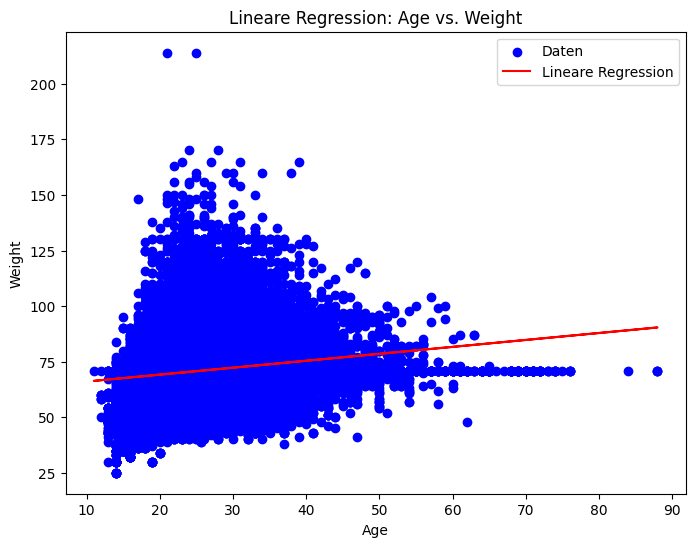

In [85]:

X = df_olim['Age'].values.reshape(-1, 1) # variable independiente
y = df_olim['Weight'].values # variable dependiente
regression_model = LinearRegression()
regression_model.fit(X, y)
y_pred = regression_model.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='b', label='Daten')
plt.plot(X, y_pred, color='r', label='Lineare Regression')
plt.title('Lineare Regression: Age vs. Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend()
plt.show()


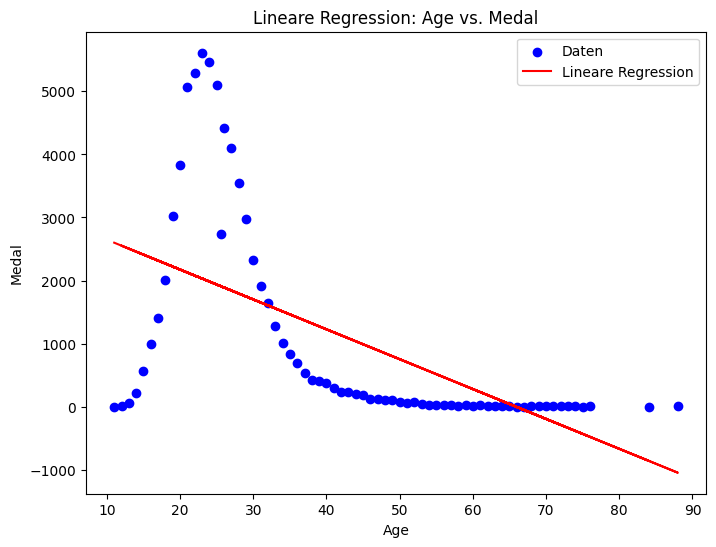

In [86]:

X = df_2['Age'].values.reshape(-1, 1) # variable independiente
y = df_2['Medal'].values # variable dependiente
regression_model = LinearRegression()
regression_model.fit(X, y)
y_pred = regression_model.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='b', label='Daten')
plt.plot(X, y_pred, color='r', label='Lineare Regression')
plt.title('Lineare Regression: Age vs. Medal')
plt.xlabel('Age')
plt.ylabel('Medal')
plt.legend()
plt.show()
